In [5]:
from keras import layers,models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('nifty.csv', index_col='Date', parse_dates=True)[['Open','High','Low','Close']]

In [8]:
sc= MinMaxScaler()

In [9]:
scdata= sc.fit_transform(data)

In [10]:
n= int(len(scdata)*0.8)

In [11]:
xtrain= scdata[:n]

In [12]:
xtest=scdata[n:]

In [13]:
n_features=4
n_length=3

In [14]:
train_generator= TimeseriesGenerator(xtrain,xtrain,length= n_length)
test_generator = TimeseriesGenerator(xtest,xtest,length = n_length)

In [16]:
model= models.Sequential([
    layers.LSTM(50,activation='relu'),
    layers.Dense(4)])

In [18]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy'])

In [20]:
model.fit(train_generator,epochs=50)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7526 - loss: 9.3934e-04
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7275 - loss: 7.5402e-04
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6869 - loss: 5.0290e-04
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7602 - loss: 5.2164e-04
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8360 - loss: 3.1619e-04
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7043 - loss: 3.1220e-04
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7084 - loss: 2.9479e-04
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5395 - loss: 2.5502e-04
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5078 - loss: 2.1283e-04
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4942 - loss: 1.6748e-04
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5362 - loss: 1.5237e-04
Epoch 12/50
14/14 ━━

In [21]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,614 (131.31 KB)

 Trainable params: 11,204 (43.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,410 (87.54 KB)

None


In [23]:
predictions= model.predict(test_generator)

C:\Users\aswin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


In [26]:
prediction_real = sc.inverse_transform(predictions)

In [28]:
test_data =  sc.inverse_transform(xtest[n_length:])

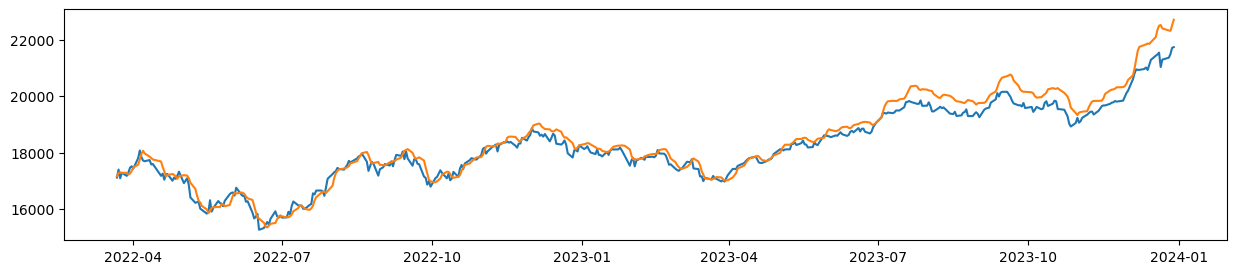

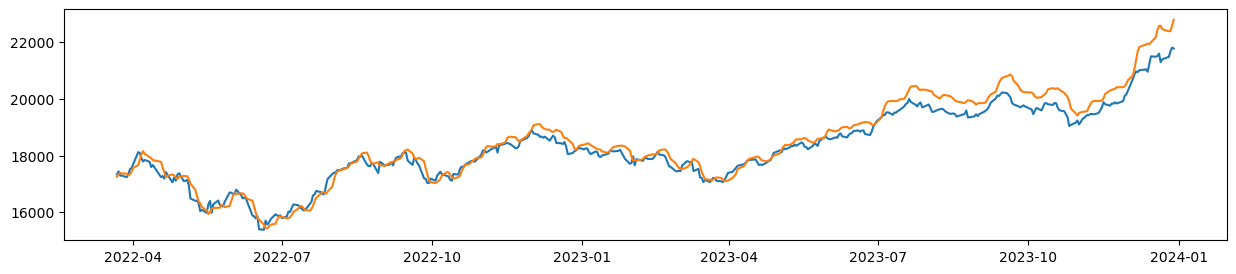

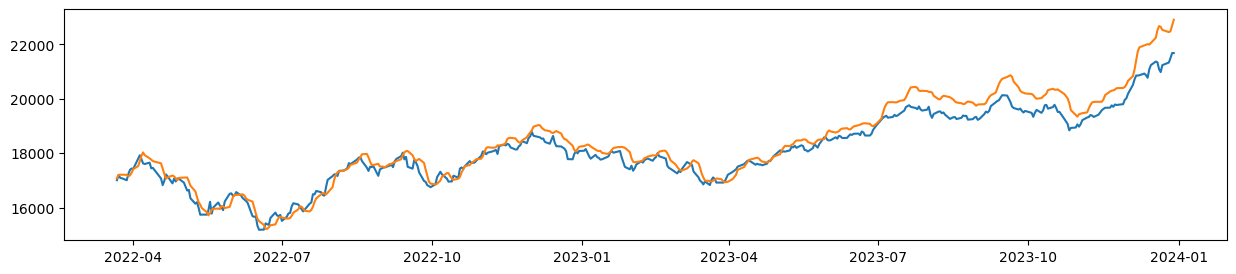

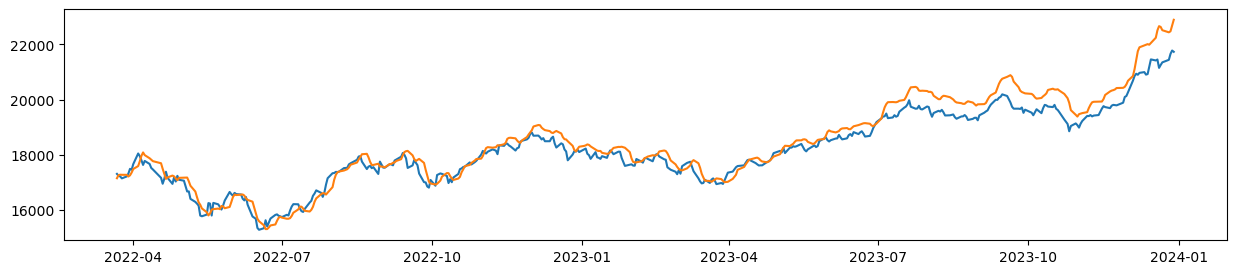

In [31]:
import matplotlib.pyplot as plt
variables=['Open','High','Low','Close']

for index, value in enumerate(variables):
    plt.figure(figsize=(15,3))
    plt.plot(data.index[n+n_length:], test_data[:,index])
    plt.plot(data.index[n+n_length:], prediction_real[:,index])